In [1]:
from astropy.io import ascii
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

/Users/ih64/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Problem 1: Using CDF to draw from non-standard PDF 

$P(y)$ must be normalized so that $\int_0^1 P(y) \, $d$y = 1$

$\int_0^1 ky \,$d$y$ = k/2 = 1, so k = 2

now we invert this equation to solve for y(x)

$x = F(y) = \int_0^y 2y' $d$y' = y^2 $

$\sqrt{x} = y(x)$

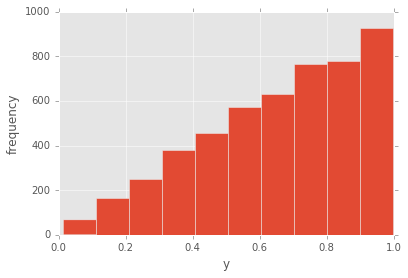

In [2]:
#sample 5000 points from a uniform distribution
x=np.random.random(5000)
#invert them using the expression we found above to get our y's
y=np.sqrt(x)
#lets plot a histogram to see if we get the linear PDF we want
plt.hist(y)
plt.ylabel('frequency')
plt.xlabel('y')

## Problem 3: Covariance, correlation, and hypothesis testing

In [7]:
#read in the data
table=ascii.read('lx_t.dat')

#define our variables
x=np.log10(table['L'].data)
y=np.log10(table['T'].data)
x_bar = x.mean()
y_bar = y.mean()
N=x.size

#define departures from the mean. this will make some caluculations look neater below
x_dep=(x-x_bar)
y_dep=(y-y_bar)

#calculate covariances. remember its symmetric so Cxy = Cyx
Cxx=x_dep.dot(x_dep.T)/N
Cyy=y_dep.dot(y_dep.T)/N
Cxy=x_dep.dot(y_dep.T)/N

#r can be constructed from the values we calculated
r=Cxy/(np.sqrt(Cxx*Cyy))

print "the elements of the Covariance Matrix are Cxx = %.3f Cyy = %.3f and Cxy = Cyx = %.3f" %(Cxx, Cyy, Cxy)
print "the value of our r statistic is %.3f" %r

the elements of the Covariance Matrix are Cxx = 1.048 Cyy = 0.084 and Cxy = Cyx = 0.266
the value of our r statistic is 0.897


In [10]:
#we calculate sigma for the distribution, assuming gaussian errors
sig_gaus=1/np.sqrt(N)

#now find how many sigma r is worth
print "our r statistic is %.3f sigma away from the mean" %(r/sig_gaus)

our r statistic is 14.819 sigma away from the mean


the r statistic is ~14.8 $\sigma$ away from the mean. A 95% level would be about 2 $\sigma$. Our result is well above this threshold. As a result, we reject the null hypothesis that there is no correlation at the 95% level

In [11]:
#here we define the model parameters a and b that are defined in class.
a= y_bar - ((Cxy)/(Cxx**2))*x_bar

b=((Cxy)/(Cxx**2))

#using these we can make predictions for our model
#copy over the xdata
x_model = x.copy()
#sort the x data. this makes it ordered nicely when plotted
x_model.sort()
#use the x inputs to make y value predictions from our model
y_model =  a + b*x_model

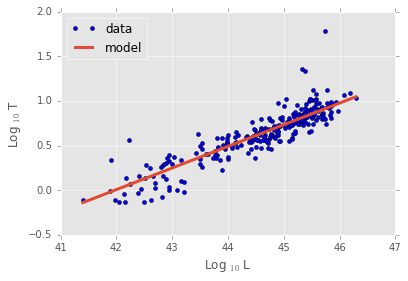

In [12]:
plt.xlabel('Log $_{10}$ L')
plt.ylabel('Log $_{10}$ T')
plt.plot(x, y, 'bo', ms=4.0, label='data')
plt.plot(x_model, y_model, linewidth=3.0, label='model')
plt.legend(loc="upper left")

In [14]:
print "our values for a and b are %.3f and %.3f respectively" %(a, b)

our values for a and b are -10.174 and 0.242 respectively
